In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_transform import analysis as al
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
data = pd.read_excel("raw_data/regression_data.xls")

In [5]:
data["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
data = data[~data["bedrooms"].isin([9, 10, 11, 33])]

In [13]:
data["bedrooms"].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
7      38
8      13
Name: bedrooms, dtype: int64

In [6]:
data["view"].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [7]:
data["floors"].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [8]:
data["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
data = data.drop(columns=["lat", "long", "yr_renovated"])

In [16]:
display(data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,1410,1287,400000


In [4]:
# dropping duplicated rows

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape # -> no duplicates

(21586, 18)

In [19]:
# split into continous and discrete data

In [20]:
data_continous, data_discrete = al.sep_cont_disc(data)

In [21]:
display(data_continous)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,221900
1,2570,7242,2170,400,1690,7639,538000
2,770,10000,770,0,2720,8062,180000
3,1960,5000,1050,910,1360,5000,604000
4,1680,8080,1680,0,1800,7503,510000
...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509,360000
21593,2310,5813,2310,0,1830,7200,400000
21594,1020,1350,1020,0,1020,2007,402101
21595,1600,2388,1600,0,1410,1287,400000


In [22]:
data_continous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sqft_living    21586 non-null  int64
 1   sqft_lot       21586 non-null  int64
 2   sqft_above     21586 non-null  int64
 3   sqft_basement  21586 non-null  int64
 4   sqft_living15  21586 non-null  int64
 5   sqft_lot15     21586 non-null  int64
 6   price          21586 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB


In [23]:
display(data_discrete)

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,7129300520,2014-10-13,3,1.00,1.0,0,0,3,7,1955,98178
1,6414100192,2014-12-09,3,2.25,2.0,0,0,3,7,1951,98125
2,5631500400,2015-02-25,2,1.00,1.0,0,0,3,6,1933,98028
3,2487200875,2014-12-09,4,3.00,1.0,0,0,5,7,1965,98136
4,1954400510,2015-02-18,3,2.00,1.0,0,0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,3.0,0,0,3,8,2009,98103
21593,6600060120,2015-02-23,4,2.50,2.0,0,0,3,8,2014,98146
21594,1523300141,2014-06-23,2,0.75,2.0,0,0,3,7,2009,98144
21595,291310100,2015-01-16,3,2.50,2.0,0,0,3,8,2004,98027


In [24]:
data_discrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          21586 non-null  int64         
 1   date        21586 non-null  datetime64[ns]
 2   bedrooms    21586 non-null  int64         
 3   bathrooms   21586 non-null  float64       
 4   floors      21586 non-null  float64       
 5   waterfront  21586 non-null  int64         
 6   view        21586 non-null  int64         
 7   condition   21586 non-null  int64         
 8   grade       21586 non-null  int64         
 9   yr_built    21586 non-null  int64         
 10  zipcode     21586 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 2.0 MB


In [25]:
# checking for NaN

In [26]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [27]:
# plotting discrete data

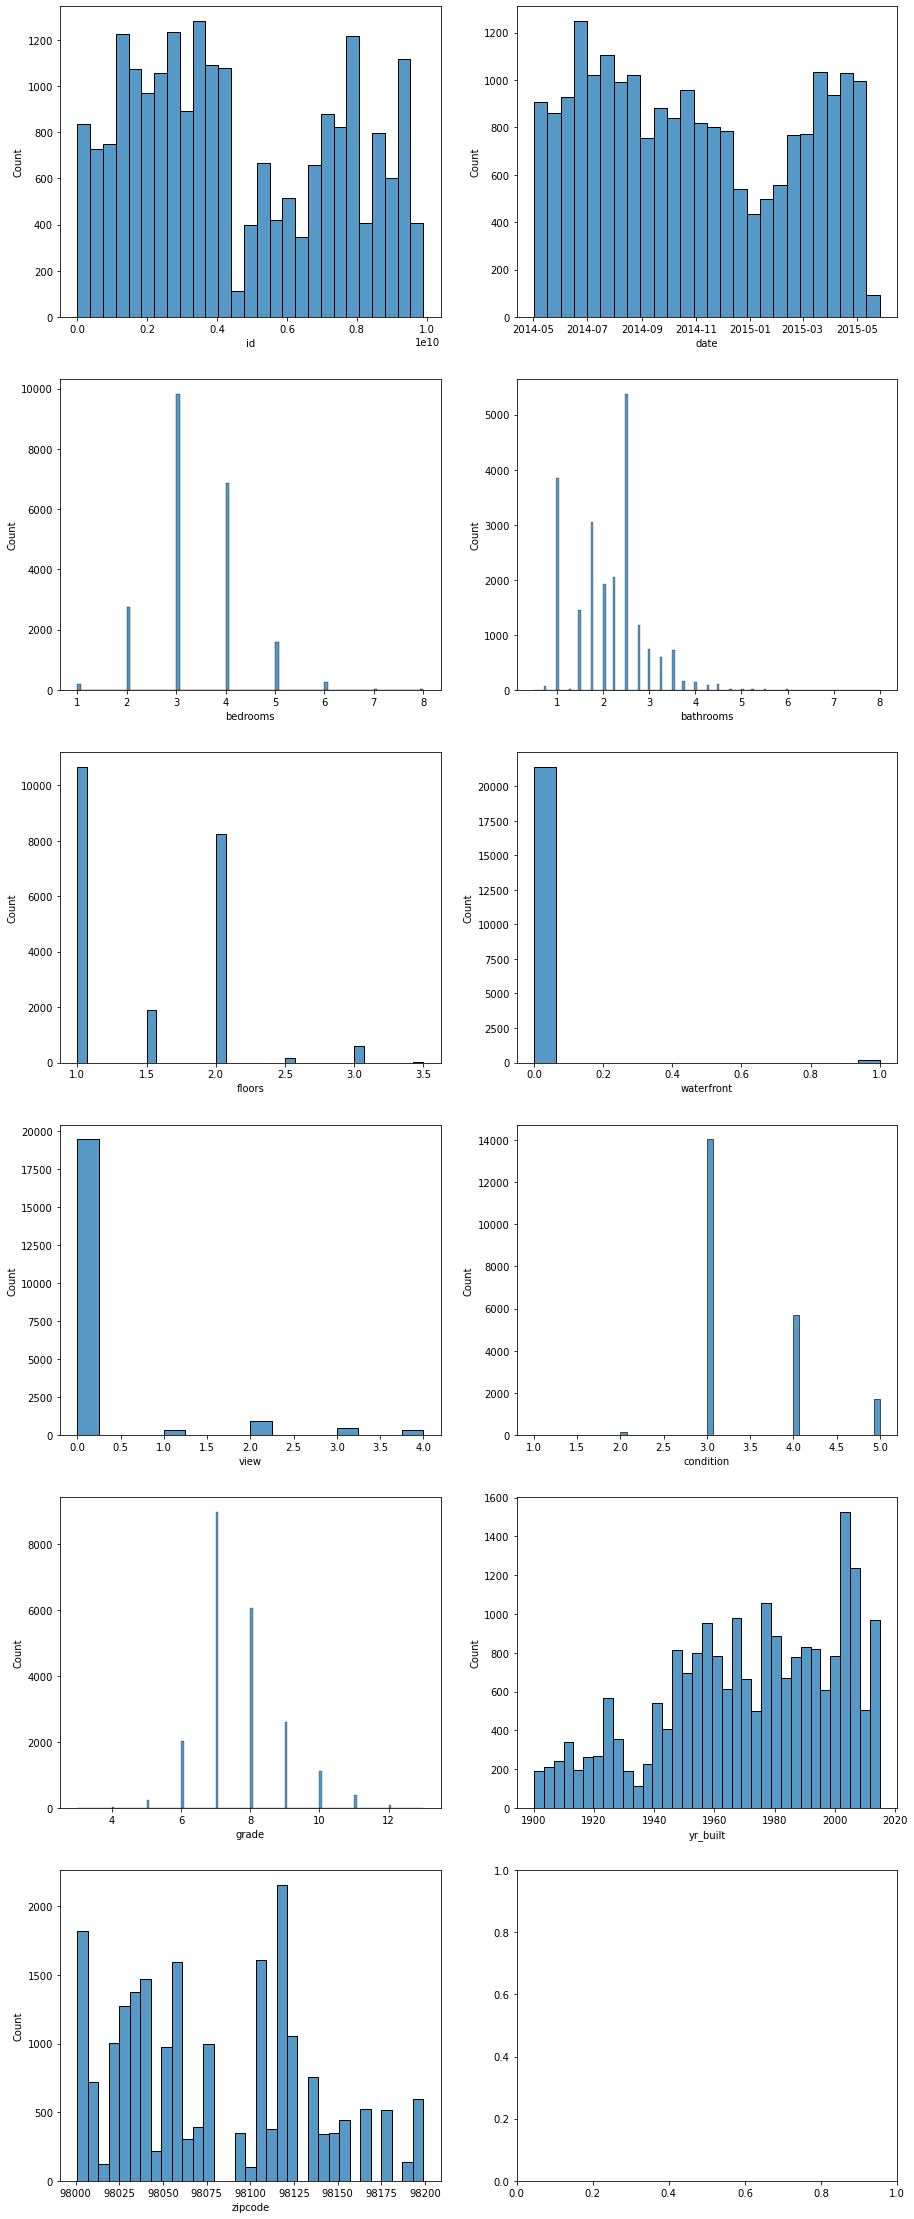

In [28]:
al.plot_discrete(data_discrete)

In [29]:
# plotting continous data

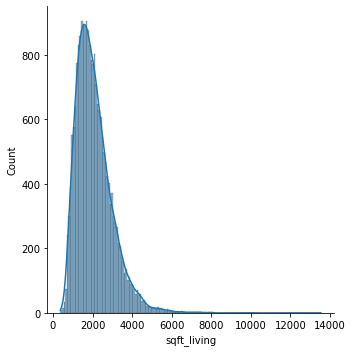

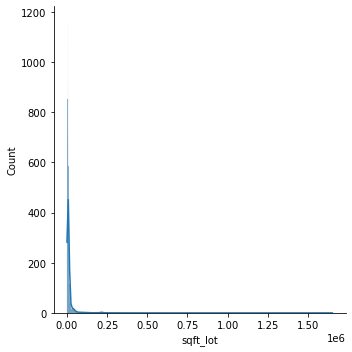

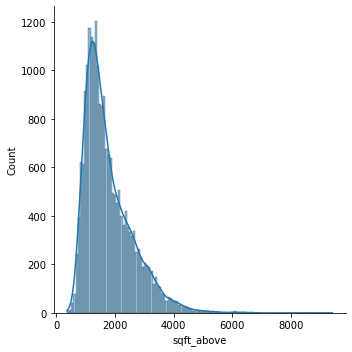

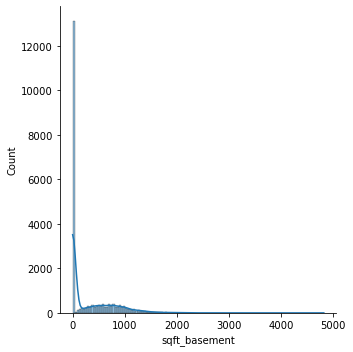

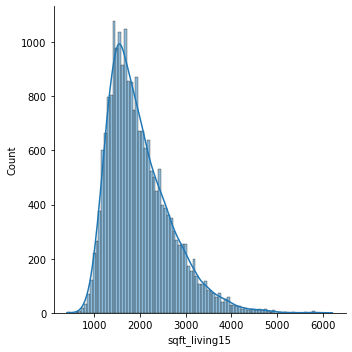

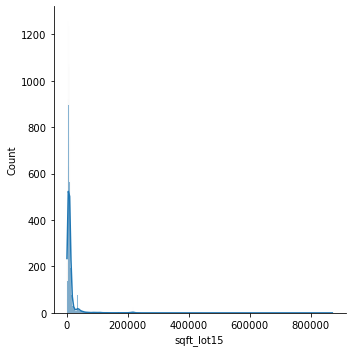

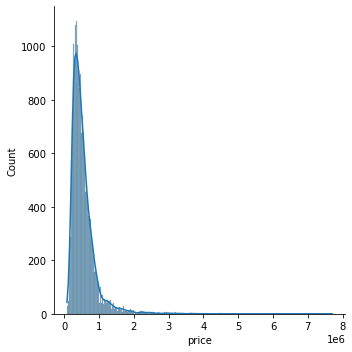

In [30]:
al.plot_continous(data_continous)

In [19]:
# boxplot continous data

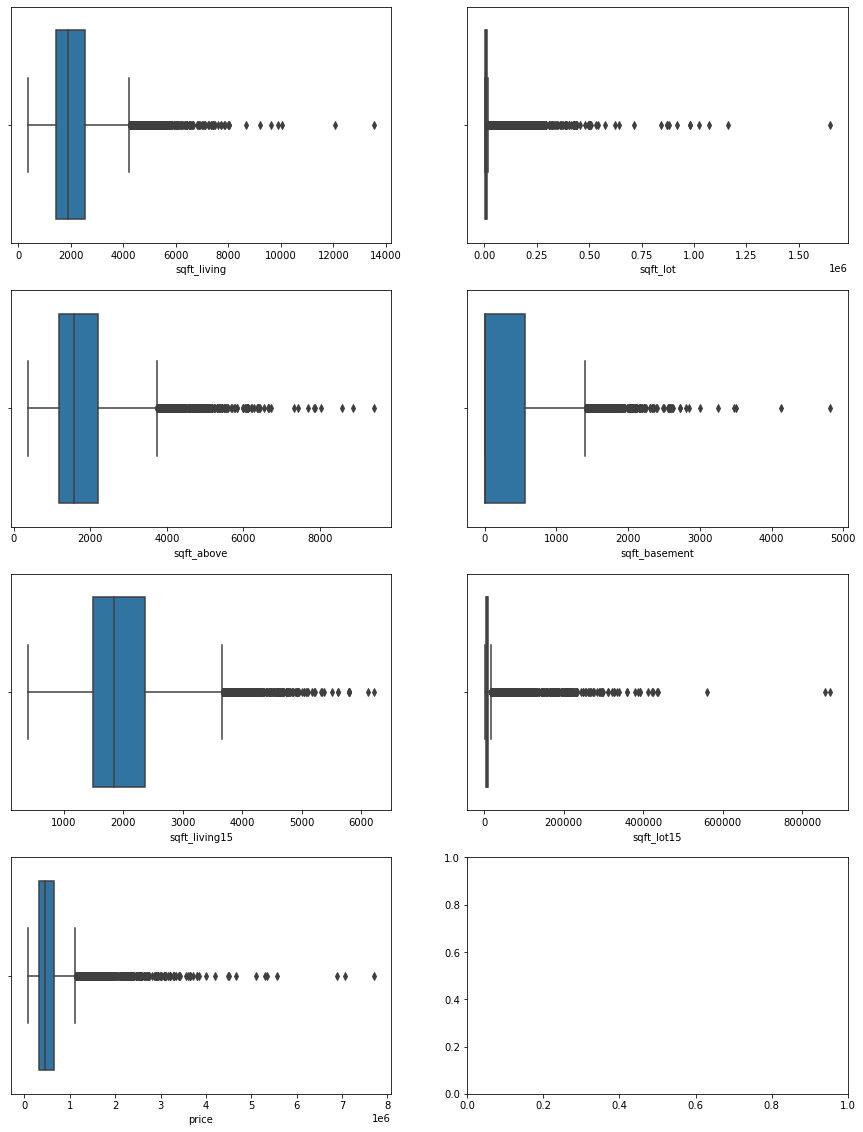

In [31]:
al.boxplot_continous(data_continous)

In [21]:
# check and search the suitable transformer

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

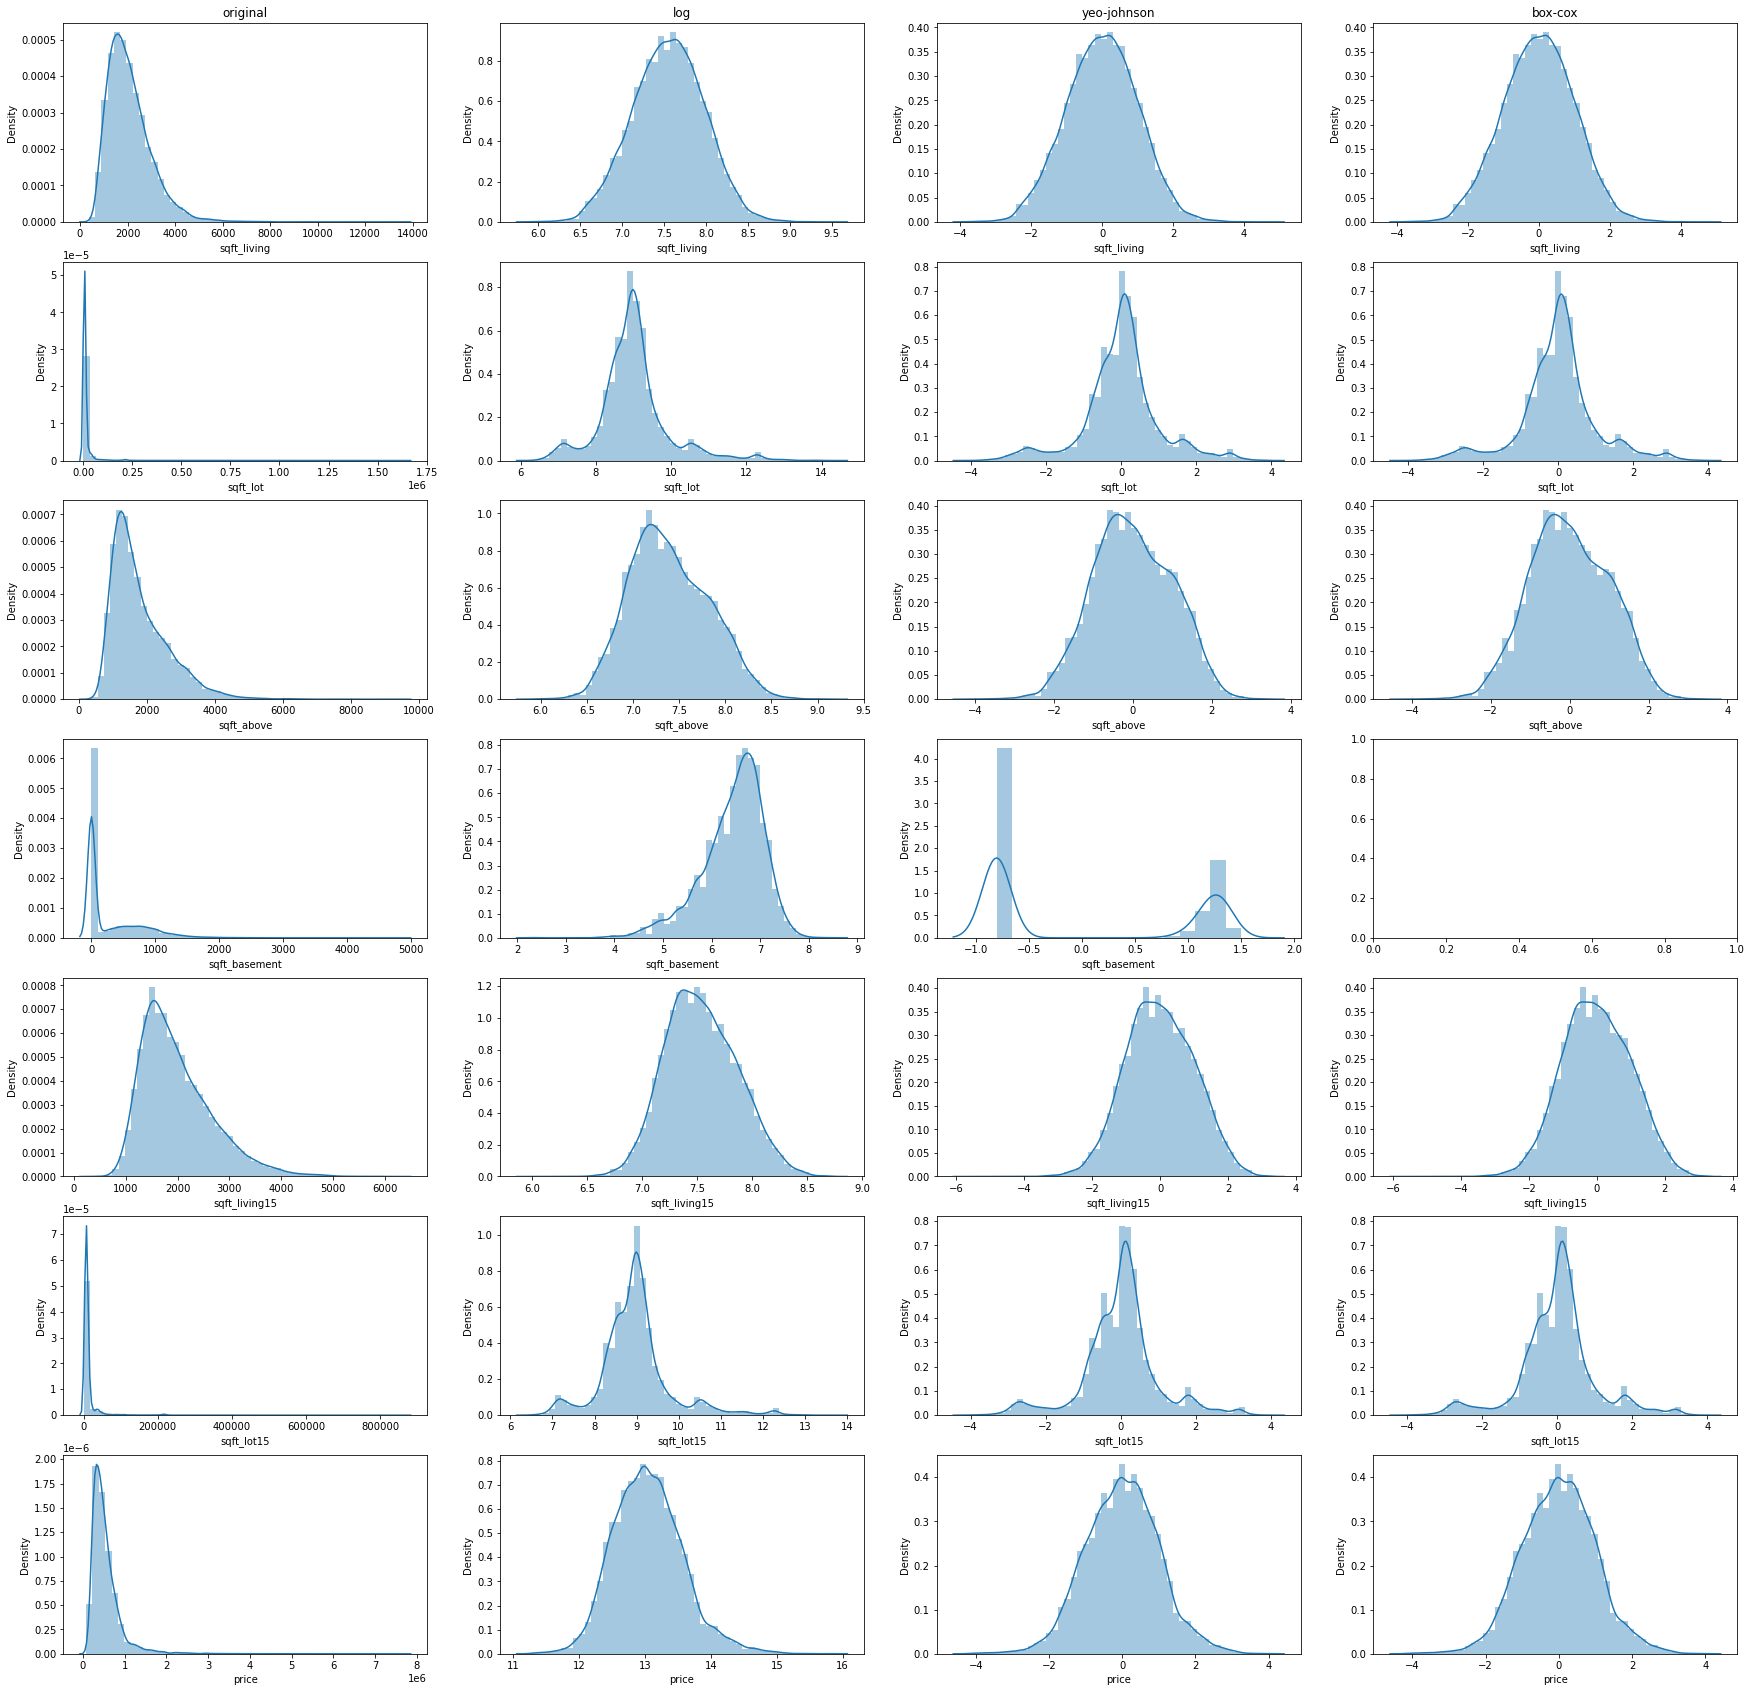

In [32]:
al.plot_transformer(data_continous)

In [33]:
# apply log transformation on the continous values

In [34]:
data_continous_log = al.log_it(data_continous)

In [35]:
display(data_continous_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,7.073270,8.639411,7.073270,NaN,7.200425,8.639411,12.309982
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614
2,6.646391,9.210340,6.646391,NaN,7.908387,8.994917,12.100712
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329
4,7.426549,8.997147,7.426549,NaN,7.495542,8.923058,13.142166
...,...,...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,NaN,7.333023,7.319202,12.793859
21593,7.745003,8.667852,7.745003,NaN,7.512071,8.881836,12.899220
21594,6.927558,7.207860,6.927558,NaN,6.927558,7.604396,12.904459
21595,7.377759,7.778211,7.377759,NaN,7.251345,7.160069,12.899220


In [36]:
data_continous_log.isna().sum()

sqft_living          0
sqft_lot             0
sqft_above           0
sqft_basement    13109
sqft_living15        0
sqft_lot15           0
price                0
dtype: int64

In [37]:
data_continous_log["sqft_basement"] = data_continous_log["sqft_basement"].fillna(0)

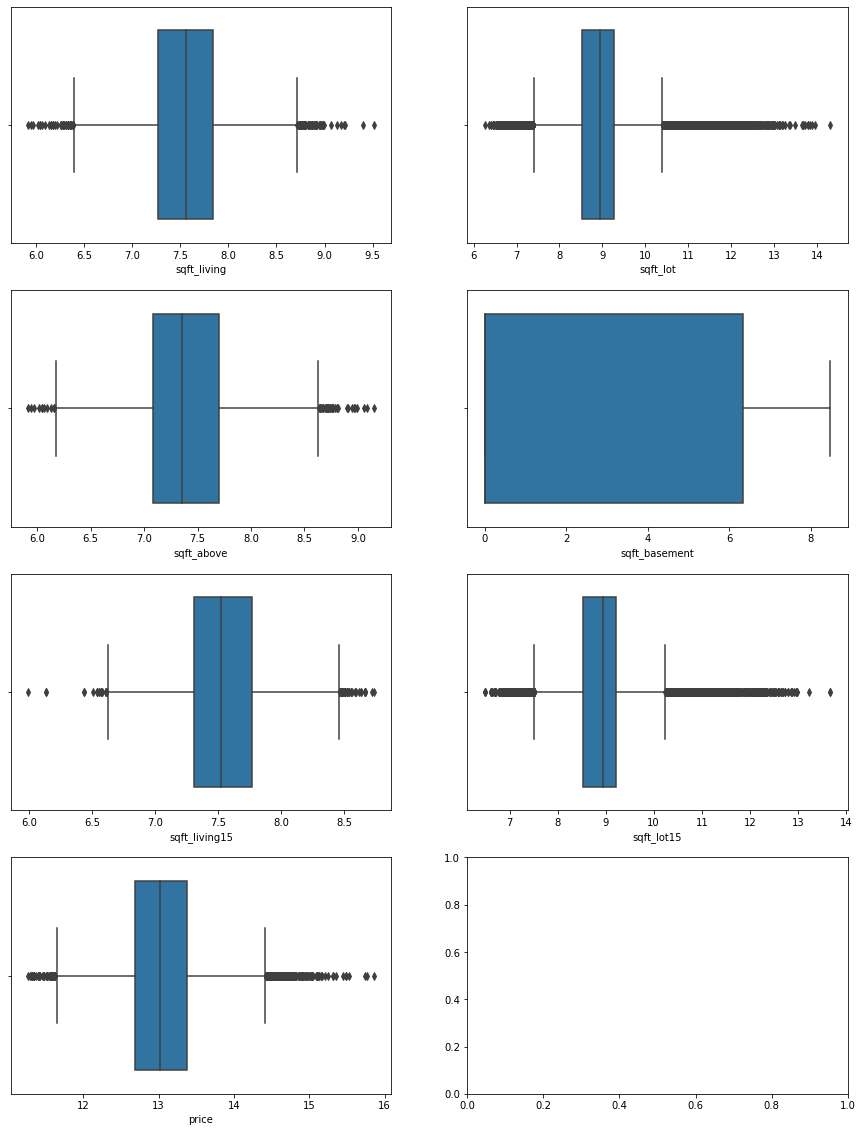

In [38]:
al.boxplot_continous(data_continous_log)

In [39]:
# removing outliers

In [40]:
# data with log transformation

In [41]:
cont_outl_rem_log, disc_outl_rem_log = al.remove_outliers(data_continous_log, data_discrete)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,12.309982,7129300520,2014-10-13,3,1.00,1.0,0,0,3,7,1955,98178
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614,6414100192,2014-12-09,3,2.25,2.0,0,0,3,7,1951,98125
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,12.100712,5631500400,2015-02-25,2,1.00,1.0,0,0,3,6,1933,98028
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329,2487200875,2014-12-09,4,3.00,1.0,0,0,5,7,1965,98136
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,13.142166,1954400510,2015-02-18,3,2.00,1.0,0,0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.030857,7.333023,0.000000,7.333023,7.319202,12.793859,263000018,2014-05-21,3,2.50,3.0,0,0,3,8,2009,98103
21593,7.745003,8.667852,7.745003,0.000000,7.512071,8.881836,12.899220,6600060120,2015-02-23,4,2.50,2.0,0,0,3,8,2014,98146
21594,6.927558,7.207860,6.927558,0.000000,6.927558,7.604396,12.904459,1523300141,2014-06-23,2,0.75,2.0,0,0,3,7,2009,98144
21595,7.377759,7.778211,7.377759,0.000000,7.251345,7.160069,12.899220,291310100,2015-01-16,3,2.50,2.0,0,0,3,8,2004,98027


3555 rows have been removed, 16.469007690169555% in total


In [42]:
display(cont_outl_rem_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,12.309982
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,13.195614
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,12.100712
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,13.311329
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,13.142166
...,...,...,...,...,...,...,...
21586,7.313220,9.389992,7.313220,0.000000,7.185387,9.332823,12.319401
21587,7.727535,8.619027,7.727535,0.000000,7.727535,8.653645,13.136759
21589,7.832014,8.703341,7.832014,0.000000,7.832014,8.703341,13.322337
21590,8.163371,8.881836,7.863267,6.813445,7.625595,8.732305,13.825461


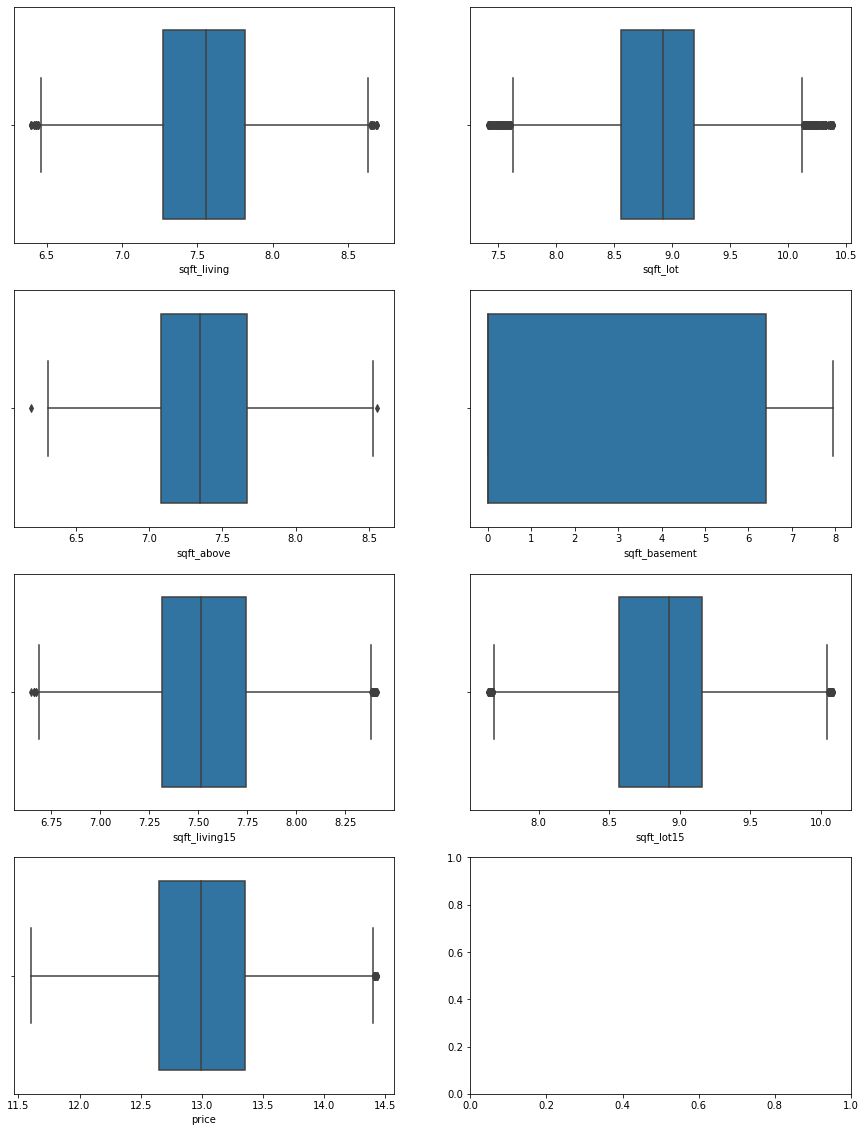

In [43]:
al.boxplot_continous(cont_outl_rem_log)

In [44]:
# data without log transformation

In [45]:
cont_outl_rem, disc_outl_rem = al.remove_outliers(data_continous, data_discrete)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,1180,5650,1180,0,1340,5650,221900,7129300520,2014-10-13,3,1.00,1.0,0,0,3,7,1955,98178
1,2570,7242,2170,400,1690,7639,538000,6414100192,2014-12-09,3,2.25,2.0,0,0,3,7,1951,98125
2,770,10000,770,0,2720,8062,180000,5631500400,2015-02-25,2,1.00,1.0,0,0,3,6,1933,98028
3,1960,5000,1050,910,1360,5000,604000,2487200875,2014-12-09,4,3.00,1.0,0,0,5,7,1965,98136
4,1680,8080,1680,0,1800,7503,510000,1954400510,2015-02-18,3,2.00,1.0,0,0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,1530,1509,360000,263000018,2014-05-21,3,2.50,3.0,0,0,3,8,2009,98103
21593,2310,5813,2310,0,1830,7200,400000,6600060120,2015-02-23,4,2.50,2.0,0,0,3,8,2014,98146
21594,1020,1350,1020,0,1020,2007,402101,1523300141,2014-06-23,2,0.75,2.0,0,0,3,7,2009,98144
21595,1600,2388,1600,0,1410,1287,400000,291310100,2015-01-16,3,2.50,2.0,0,0,3,8,2004,98027


4899 rows have been removed, 22.695265449828593% in total


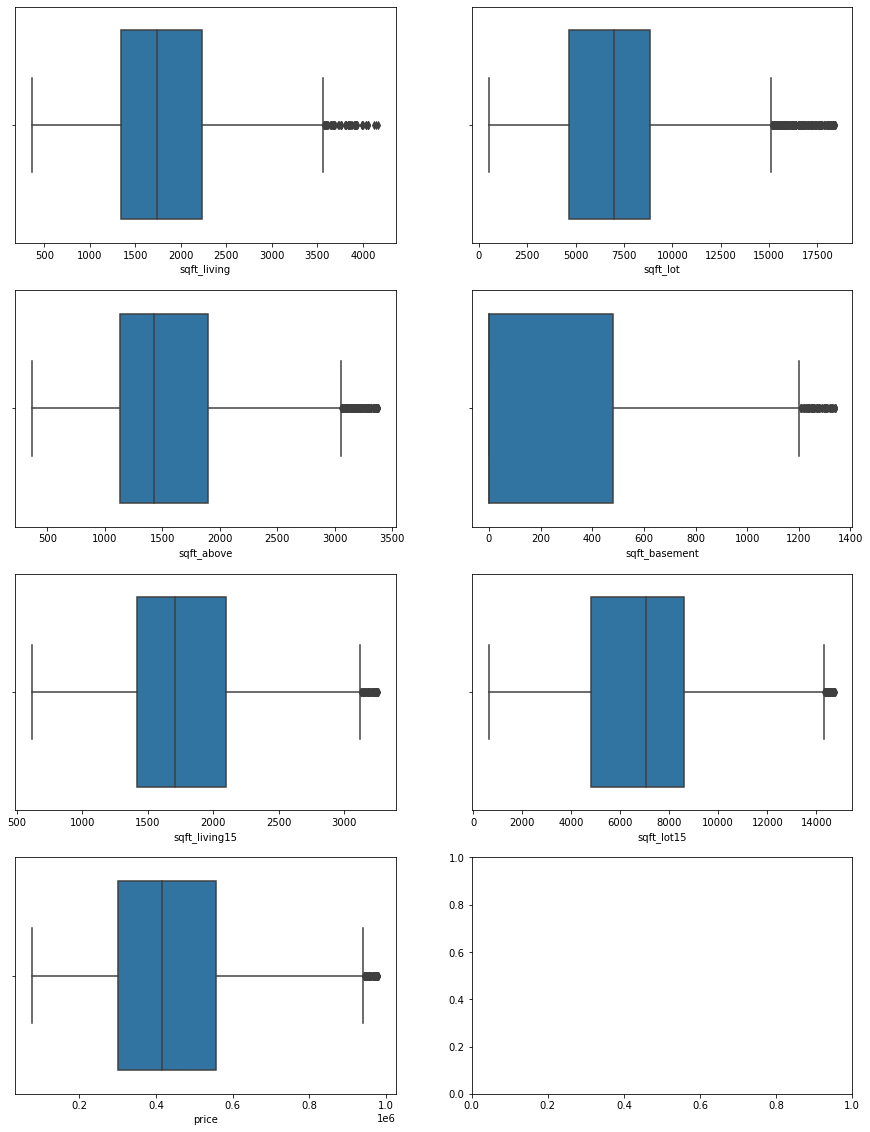

In [46]:
al.boxplot_continous(cont_outl_rem)

In [47]:
# Correlation-Matrix outliers removed log

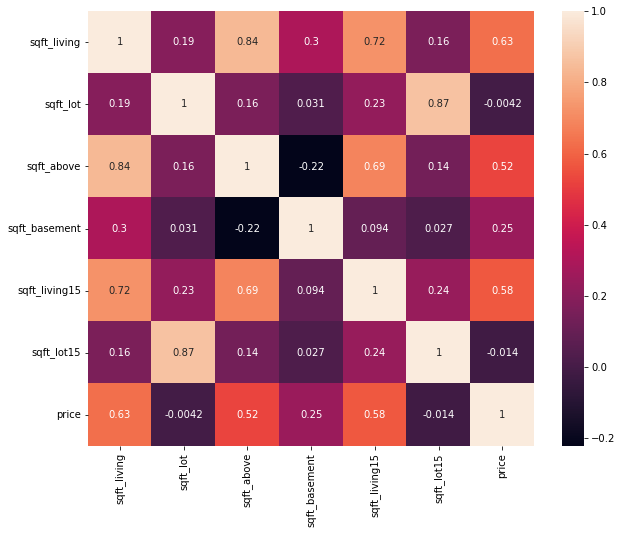

In [48]:
corr_matrix=cont_outl_rem_log.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
# Correlation-Matrix outliers removed log

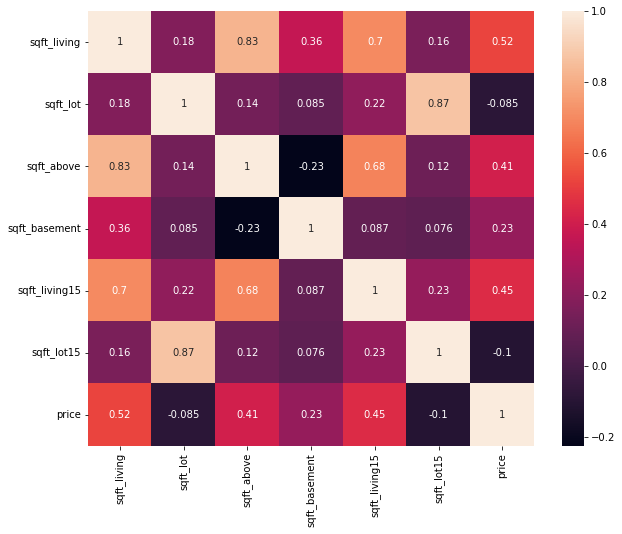

In [50]:
corr_matrix=cont_outl_rem.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [51]:
# Correlation-Matrix before removing outliers

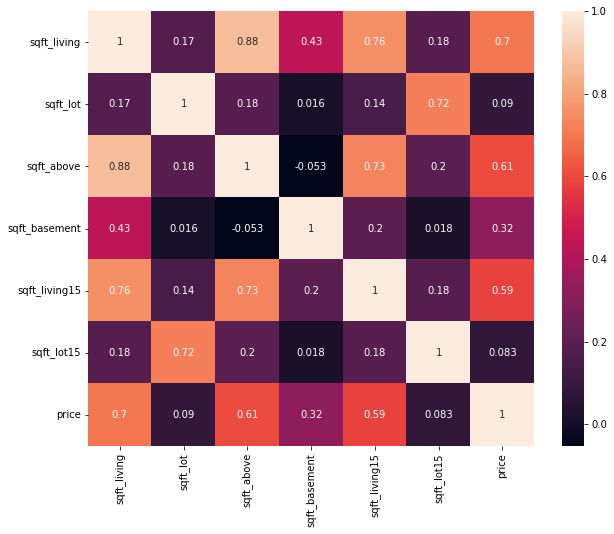

In [52]:
corr_matrix=data_continous.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [53]:
# convert the date in month since the house was sold from today

In [54]:
disc_outl_rem_log["date"] = disc_outl_rem_log["date"].apply(al.months)

In [55]:
disc_outl_rem["date"] = disc_outl_rem["date"].apply(al.months)

In [56]:
# drop column id

In [57]:
disc_outl_rem_log = disc_outl_rem_log.drop(columns=["id"])

In [58]:
disc_outl_rem = disc_outl_rem.drop(columns=["id"])

In [59]:
# concat dataframes

In [60]:
final_cleaned_log = pd.concat([cont_outl_rem_log, disc_outl_rem_log], axis=1)

In [61]:
final_cleaned = pd.concat([cont_outl_rem, disc_outl_rem], axis=1)

In [62]:
final_cleaned_log.isna().sum()

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
price            0
date             0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
zipcode          0
dtype: int64

In [63]:
final_cleaned.isna().sum()

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
price            0
date             0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
zipcode          0
dtype: int64

In [64]:
X_log = final_cleaned_log.drop(columns=["price"])
y_log = final_cleaned_log[["price"]]
X = final_cleaned.drop(columns=["price"])
y = final_cleaned[["price"]]

In [65]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=0, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [65]:
# creating and checking model - linear regression and knn

In [66]:
# with transformed data

In [67]:
#r2_score(np.exp(y_train_log),np.exp(y_pred_train_log))

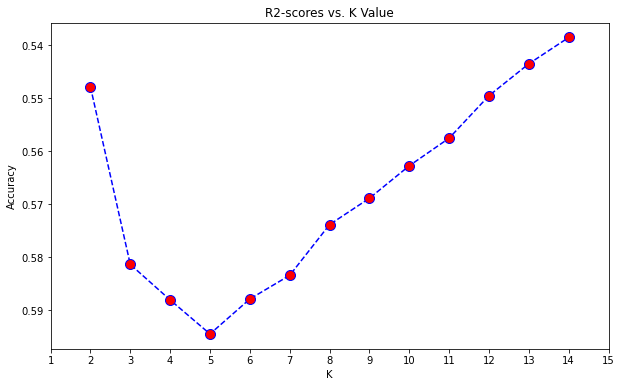

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6262175562875849
MSE: 28746896244.502037
RMSE: 169549.09685545965
MAE: 122614.73000722456
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6164842766745338
MSE: 26871811589.72004
RMSE: 163926.23825891947
MAE: 120384.11527587431
-----------------------------
Filename Linear: real_estate_log_part2_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7314748900992424
MSE: 20651755060.22353
RMSE: 143707.18513777773
MAE: 89502.52701053799
Filename knn: real_estate_log_part2_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5944560747221165
MSE: 28415262500.657845
RMSE: 168568.27252083307
MAE: 109670.98591627393
----------------------------

In [66]:
pickle_files_log = al.regression_automation(X_test_log, np.exp(y_test_log), "real_estate_log_part2", X_train_log, np.exp(y_train_log))

In [67]:
# with "raw" data

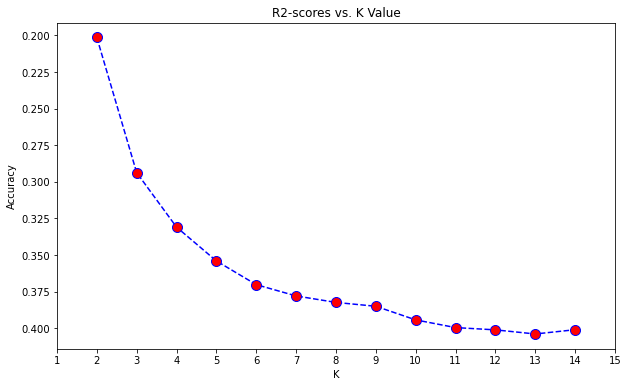

Please enter k:6
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.5301485723185967
MSE: 15347758201.043932
RMSE: 123886.06943899678
MAE: 97711.39716082101
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.5363485797707239
MSE: 15134431276.258486
RMSE: 123022.0763776099
MAE: 97045.14446192372
-----------------------------
Filename Linear: real_estate_part2_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.5546041991996158
MSE: 14548911957.504704
RMSE: 120618.87065258365
MAE: 94190.22243863462
Filename knn: real_estate_part2_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.3702140982091484
MSE: 20557364937.428226
RMSE: 143378.39773629856
MAE: 111887.57174955063
-----------------------------


In [68]:
pickle_files = al.regression_automation(X_test, y_test, "real_estate_part2", X_train, y_train)

In [69]:
# so with the transformed data we achieve better results

In [70]:
# performing with MinMaxScaler

In [77]:
X_train_log_scaled, pickle_scaler = al.min_max(X_train_log, "real_estate_scaler_log_part2")

In [72]:
X_test_log_scaled = al.min_max(X_test_log, pickle_scaler, fit=False )

In [73]:
display(X_train_log_scaled)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,0.645327,0.275803,0.560622,0.840295,0.441463,0.359498,88,4,2.75,2.0,0,0,5,7,1911,98117
1,0.476085,0.440107,0.548949,0.000000,0.523168,0.410152,91,4,2.50,2.0,0,0,3,7,2005,98059
2,0.690723,0.431951,0.757750,0.000000,0.776316,0.502468,83,4,2.50,2.0,0,0,3,10,2008,98030
3,0.742520,0.524044,0.674966,0.853697,0.674093,0.639395,84,5,3.50,2.0,0,0,3,9,2001,98006
4,0.614569,0.465436,0.435646,0.879179,0.578916,0.472922,93,3,2.00,1.0,0,2,4,8,1952,98136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,0.294587,0.315333,0.326946,0.601816,0.420823,0.290112,89,3,1.00,1.0,0,0,3,7,1939,98117
14420,0.719483,0.668402,0.632467,0.861898,0.644097,0.656731,92,5,3.25,2.0,0,0,3,8,1975,98027
14421,0.600169,0.595258,0.669659,0.000000,0.735822,0.699953,83,3,2.50,2.0,0,0,3,8,2001,98001
14422,0.463745,0.484790,0.536945,0.000000,0.273818,0.486617,92,3,2.50,2.0,0,0,3,7,1990,98042


In [74]:
display(X_test_log_scaled)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,0.279566,0.537430,0.357775,0.000000,0.377162,0.580489,83,3,1.0,1.0,0,0,3,7,1959,98005
1,0.759349,0.610045,0.824509,0.000000,0.853872,0.649041,94,4,2.5,2.0,0,0,3,10,2000,98034
2,0.720873,0.636272,0.787079,0.000000,0.795171,0.680983,92,3,2.5,2.0,0,0,3,10,1991,98075
3,0.235370,0.312859,0.314781,0.000000,0.354011,0.199046,83,2,1.0,1.0,0,0,3,8,1981,98038
4,0.729389,0.369881,0.795364,0.000000,0.647639,0.350076,89,4,2.5,2.0,0,0,3,9,2014,98030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,0.429924,0.306389,0.504043,0.000000,0.438074,0.313447,84,3,1.0,1.5,0,0,5,7,1928,98126
3603,0.581473,0.339487,0.651471,0.000000,0.603857,0.319529,89,4,2.5,2.0,0,0,3,8,2003,98075
3604,0.862845,0.445436,0.835483,0.844923,0.816585,0.433234,89,5,3.5,2.0,0,2,3,10,2007,98027
3605,0.471191,0.372305,0.544188,0.000000,0.392090,0.359498,84,4,2.0,2.0,0,0,4,7,1906,98107


In [75]:
# # creating and checking model - linear regression and knn - scaled data

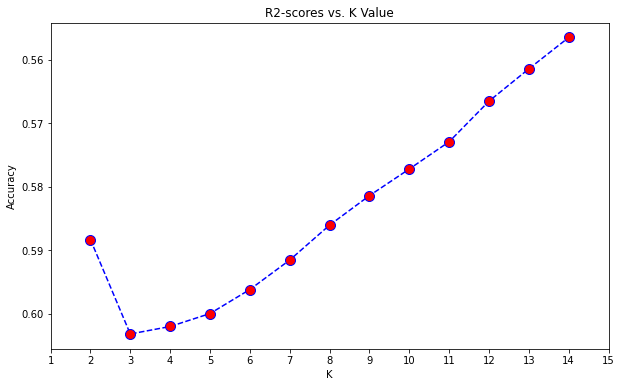

Please enter k:3
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6262175562875851
MSE: 28746896244.502018
RMSE: 169549.0968554596
MAE: 122614.73000722456
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6164842766745342
MSE: 26871811589.720016
RMSE: 163926.23825891942
MAE: 120384.11527587436
-----------------------------
Filename Linear: real_estate_scaled_part2_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.8199897216937846
MSE: 13844247851.817535
RMSE: 117661.58188558207
MAE: 74085.92829081161
Filename knn: real_estate_scaled_part2_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.6031581970552164
MSE: 27805530545.633648
RMSE: 166749.90418478101
MAE: 108209.2650401996
----------------------

In [76]:
pickle_files_scaled = al.regression_automation(X_test_log_scaled, np.exp(y_test_log), "real_estate_scaled_part2", X_train_log_scaled, np.exp(y_train_log))

In [78]:
# using OneHotEncoder on some of the discrete values

In [78]:
display(X_log)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
0,7.073270,8.639411,7.073270,0.000000,7.200425,8.639411,89,3,1.00,1.0,0,0,3,7,1955,98178
1,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,87,3,2.25,2.0,0,0,3,7,1951,98125
2,6.646391,9.210340,6.646391,0.000000,7.908387,8.994917,85,2,1.00,1.0,0,0,3,6,1933,98028
3,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,87,4,3.00,1.0,0,0,5,7,1965,98136
4,7.426549,8.997147,7.426549,0.000000,7.495542,8.923058,85,3,2.00,1.0,0,0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,7.313220,9.389992,7.313220,0.000000,7.185387,9.332823,93,3,1.75,1.0,0,0,3,6,2014,98010
21587,7.727535,8.619027,7.727535,0.000000,7.727535,8.653645,91,3,2.50,2.0,0,0,3,8,2003,98065
21589,7.832014,8.703341,7.832014,0.000000,7.832014,8.703341,89,4,2.50,2.0,0,0,3,9,2014,98056
21590,8.163371,8.881836,7.863267,6.813445,7.625595,8.732305,84,4,3.50,2.0,0,0,3,9,2009,98136


In [79]:
X_one_hot = X_log.copy()

In [80]:
X_train_log_hot, X_test_log_hot, y_train_log_hot, y_test_log_hot, pickle_one_hot = al.one_hot(X_one_hot, "real_estate_one_hot_part2", y= y_log)

In [81]:
display(X_train_log_hot)

,bedrooms_2,bedrooms_4,bedrooms_5,bedrooms_1,bedrooms_6,bedrooms_many,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,...,sqft_basement,sqft_living15,sqft_lot15,date,waterfront,view,condition,grade,yr_built,zipcode
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.684612,7.432484,8.517193,88,0,0,5,7,1911,98117
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,7.575585,8.641179,91,0,0,3,7,2005,98059
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,8.018955,8.867146,83,0,0,3,10,2008,98030
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.791221,7.839919,9.202308,84,0,0,3,9,2001,98006
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.993933,7.673223,8.794825,93,0,2,4,8,1952,98136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.787492,7.396335,8.347353,89,0,0,3,7,1939,98117
14420,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.856462,7.787382,9.244742,92,0,0,3,8,1975,98027
14421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,7.948032,9.350537,83,0,0,3,8,2001,98001
14422,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,7.138867,8.828348,92,0,0,3,7,1990,98042


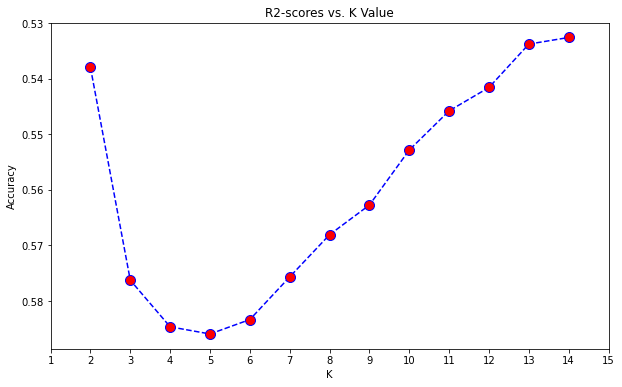

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6394824594914328
MSE: 27726717789.069374
RMSE: 166513.41624346483
MAE: 120349.30679635538
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6301779814188406
MSE: 25912334229.408554
RMSE: 160973.08541929783
MAE: 118932.6721012253
-----------------------------
Filename Linear: real_estate_onehot_part2_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7242770230744324
MSE: 21205329311.835873
RMSE: 145620.49756760162
MAE: 90520.11999445371
Filename knn: real_estate_onehot_part2_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5859359869887736
MSE: 29012239830.069656
RMSE: 170329.79724660525
MAE: 110313.69864153035
---------------------

In [82]:
pickle_files_onehot = al.regression_automation(X_test_log_hot, np.exp(y_test_log_hot), "real_estate_onehot_part2", X_train_log_hot, np.exp(y_train_log_hot))

In [84]:
# now let#s try this with scaler

In [83]:
X_train_log_scaled_hot = al.min_max(X_train_log_hot, pickle_scaler, fit=False )

In [84]:
X_test_log_scaled_hot = al.min_max(X_test_log_hot, pickle_scaler, fit=False )

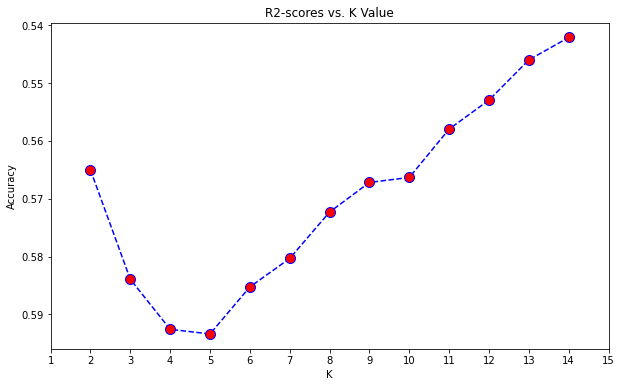

Please enter k:5
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.639482459491433
MSE: 27726717789.069355
RMSE: 166513.41624346477
MAE: 120349.30679635527
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6301779814188411
MSE: 25912334229.408527
RMSE: 160973.08541929774
MAE: 118932.67210122527
-----------------------------
Filename Linear: real_estate_onehot_scaled_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7380696986855211
MSE: 20144560885.18634
RMSE: 141931.53590793817
MAE: 88457.0189961176
Filename knn: real_estate_onehot_scaled_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.5933829865429819
MSE: 28490450613.204636
RMSE: 168791.14494903054
MAE: 109204.61580260606
---------------------

In [85]:
pickle_files_onehot_scaled = al.regression_automation(X_test_log_scaled_hot, np.exp(y_test_log_hot), "real_estate_onehot_scaled", X_train_log_scaled_hot, np.exp(y_train_log_hot))

In [86]:
# how is the performance of the original, "untouched" dataset?

In [87]:
X_plain = data.drop(columns=["price", "date"])
y_plain = data[["price"]]

In [88]:
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(X_plain, y_plain, random_state=0, test_size=0.2)

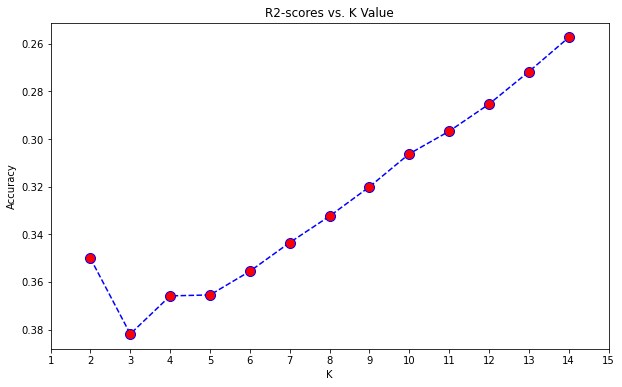

Please enter k:3
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.6534220271305143
MSE: 47747706551.31964
RMSE: 218512.48603070635
MAE: 140326.49784128985
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.6612434546479721
MSE: 41869869415.99083
RMSE: 204621.2829008528
MAE: 140956.82631210395
-----------------------------
Filename Linear: real_estate_plain_linear.sav
--------------KNN------------
----------Train Set----------
-----------------------------
R2: 0.7340494754488107
MSE: 36639742273.00858
RMSE: 191415.10461039533
MAE: 95719.2672380511
Filename knn: real_estate_plain_knn.sav
-----------------------------
--------------KNN------------
-----------Test Set----------
-----------------------------
R2: 0.3818451599112349
MSE: 76403136082.53163
RMSE: 276411.1721376899
MAE: 150099.81673614326
-----------------------------


['real_estate_plain_linear.sav', 'real_estate_plain_knn.sav']

In [89]:
al.regression_automation(X_test_plain, y_test_plain, "real_estate_plain", X_train_plain, y_train_plain)